In [1]:
# 라이브러리 로드
import missingno # pip install missingno
import numpy as np
import pandas as pd

# from pandas import DataFrame as df
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as off
import plotly.graph_objs as go

In [2]:
import platform # 플랫폼 확인

# Window
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Darwin': # Mac 
    matplotlib.rc('font', family='AppleGothic') 
else: #linux 
    matplotlib.rc('font', family='NanumGothic')

## 1. 시군구 데이터 분석 및 전처리

### 1.1 train data loading

In [3]:
train_data = pd.read_csv("../dataset/train_data.csv", sep=',')

# 거래금액 숫자형으로 변환
train_data['거래금액(만원)'] = train_data['거래금액(만원)'].str.replace(',','').astype('int64')
train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3
...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19


### 1.2 시군구 데이터 생성 및 탐색

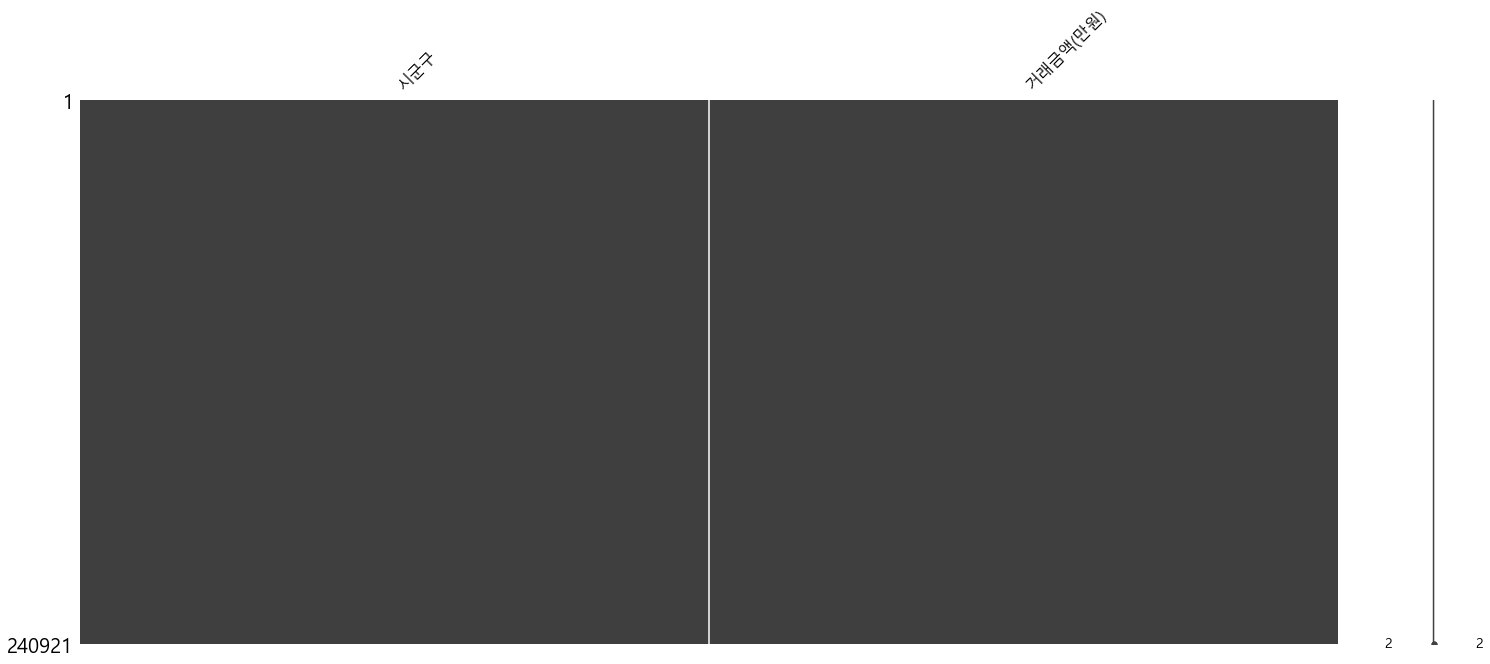

In [4]:
# 시군구 결측치 탐색
temp_data = train_data[['시군구','거래금액(만원)']]

missingno.matrix(temp_data)
plt.show() # 결측치 없음!

In [5]:
region_split = train_data['시군구'].str.split(' ', expand=True)
region_split.columns = ['시', '구', '동']

train_data.drop('시군구', axis=1, inplace=True)

train_data = pd.concat([train_data, region_split], axis=1)
train_data

,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,시,구,동
0,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,서울특별시,강남구,개포동
1,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,서울특별시,강남구,개포동
2,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,서울특별시,강남구,개포동
3,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,서울특별시,강남구,개포동
4,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,서울특별시,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...
240916,한영(104),67.57,202008,26000,2,2003,동일로144길 74,서울특별시,중랑구,중화동
240917,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,서울특별시,중랑구,중화동
240918,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,서울특별시,중랑구,중화동
240919,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,서울특별시,중랑구,중화동


<AxesSubplot:>

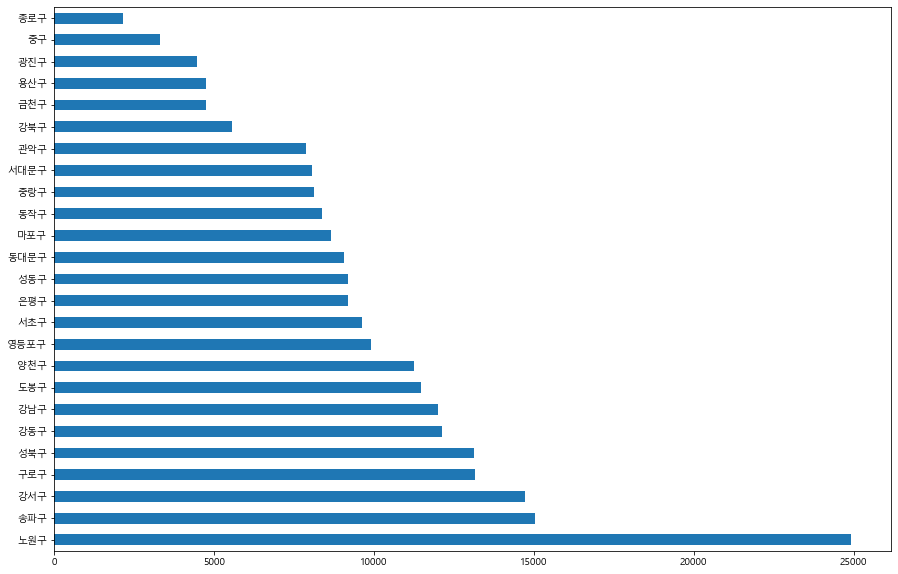

In [6]:
# 구별 거래횟수

plt.figure(figsize=(15,10))
train_data['구'].value_counts().plot.barh()

In [7]:
# 구별 내 동별 평균 거래금액

train_data_by_gu = train_data.groupby(['구']).mean()
train_data_by_gu

,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
구,,,,,
강남구,91.442268,201909.418750,172391.946333,9.306250,1997.683750
강동구,75.361315,201910.345055,74535.932965,9.453265,2001.609487
강북구,75.565458,201909.878963,48766.357169,9.315922,2003.499280
강서구,73.308650,201910.929352,60720.017306,7.830607,2001.087818
관악구,74.569392,201904.433749,54070.933622,9.378433,2001.093591
광진구,85.591974,201902.809193,92670.886547,10.430493,1998.630269
구로구,72.507784,201910.427769,49678.507705,9.685797,1999.408867
금천구,71.603233,201909.862881,42854.317350,9.524290,2001.773081
노원구,64.562158,201908.641531,45312.471622,8.077855,1993.881393


In [8]:
# 구별 거래금액 평균가격 시각화
df = train_data_by_gu.reset_index()
sorted_df = df[['구', '거래금액(만원)']].sort_values('거래금액(만원)', ascending=False)
gu_list = list(sorted_df['구'].values)

region_mean_fig = go.Figure()

trace_mean_list = []
for gu in gu_list:
    trace_region = go.Bar(x=df[df['구'] == gu]['구'], y=df[df['구'] == gu]['거래금액(만원)'], name=gu)
    trace_mean_list.append(trace_region)

region_mean_fig.add_traces(trace_mean_list)

region_mean_fig.update_layout(
    title='구별 평균 거래금액(2018~2020)',
    xaxis_title='구',
    yaxis_title='거래금액(만원)',
    yaxis_tickformat='(만원)',
    autosize=False,
    width=1200,
    height=1000
)

region_mean_fig.show()

# folium 해보기

In [9]:
!pip install --upgrade folium==0.9.0

In [10]:
import folium
folium.__version__

'0.9.0'

In [11]:
new_data.head()

NameError: name 'new_data' is not defined

In [ ]:
geo_data = 'seoul-dong.geo.json'

In [ ]:
# 서울시 중심부의 위도, 경도 입니다.
center = [37.541, 126.986]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=10)

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
folium.Choropleth(
    geo_data=geo_data,
    data=new_data,
    columns=('동', '거래금액(만원)'),
    key_on='feature.properties.동',
    fill_color='BuPu',
    legend_name='실거래가',
).add_to(m)

# 맵 m을 출력합니다.
m

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 43: illegal multibyte sequence